**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

**Download NLTK Resources**

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Initialize Stemmer and Stopword Set**

In [ ]:
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words("english"))

**Define Function to Clean Text**

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+", "", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("\n", "", text)
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    return text

**Load and Clean Dataset**

In [ ]:
data = pd.read_csv("stress.csv")
data.dropna(subset=["text","label"],inplace=True)
data["clean_text"] = data["text"].apply(clean_text)

**Prepare Features and Labels**

In [ ]:
X = data["clean_text"]
y = data["label"]

**Vectorize Data**

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)

**Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


**Train the Naive Bayes Model**

In [ ]:
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

**Train the Decision Tree Model**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Train the SVM Model**

In [ ]:
model_svm = SVC(probability=True, random_state=42)
model_svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

**Define Functions for Predicting User Input**

In [ ]:
# Function for predicting on user input for Naive Bayes
def predict_nb(user_input):
    cleaned_text = clean_text(user_input)
    transformed_input = cv.transform([cleaned_text])
    prediction = model_nb.predict(transformed_input)
    return prediction[0], model_nb.predict_proba(transformed_input)[0][prediction[0]]

# Function for predicting on user input for Decision Tree
def predict_dt(user_input):
    cleaned_text = clean_text(user_input)
    transformed_input = cv.transform([cleaned_text])
    prediction = model_dt.predict(transformed_input)
    return prediction[0], model_dt.predict_proba(transformed_input)[0][prediction[0]]

# Function for predicting on user input for SVM
def predict_svm(user_input):
    cleaned_text = clean_text(user_input)
    transformed_input = cv.transform([cleaned_text])
    prediction = model_svm.predict(transformed_input)
    return prediction[0], model_svm.predict_proba(transformed_input)[0][1]

**Predict on User Input**

In [ ]:
while True:
    user_input = input("Enter a text (type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break

    print("\n--- Naive Bayes ---")
    nb_prediction, nb_probability = predict_nb(user_input)
    print("Prediction:", "Stress" if nb_prediction == 1 else "No Stress")
    print("Probability:", nb_probability)

    print("\n--- Decision Tree ---")
    dt_prediction, dt_probability = predict_dt(user_input)
    print("Prediction:", "Stress" if dt_prediction == 1 else "No Stress")
    print("Probability:", dt_probability)

    print("\n--- SVM ---")
    svm_prediction, svm_probability = predict_svm(user_input)
    print("Prediction:", "Stress" if svm_prediction == 1 else "No Stress")
    print("Probability:", svm_probability)

Enter a text (type 'exit' to quit): Sometimes I feel like I need help

--- Naive Bayes ---
Prediction: Stress
Probability: 0.7151038987288664

--- Decision Tree ---
Prediction: Stress
Probability: 1.0

--- SVM ---
Prediction: Stress
Probability: 0.5957687086140248
Enter a text (type 'exit' to quit): People need to be aware of their health

--- Naive Bayes ---
Prediction: No Stress
Probability: 0.9363792338930813

--- Decision Tree ---
Prediction: No Stress
Probability: 1.0

--- SVM ---
Prediction: No Stress
Probability: 0.08376077287435432
Enter a text (type 'exit' to quit): exit


**Evaluate the Models**


--- Naive Bayes Evaluation ---
Confusion Matrix:
[[204 142]
 [ 69 307]]
Precision: 0.68
Recall: 0.82
F1 Score: 0.74
ROC-AUC: 0.80

--- Decision Tree Evaluation ---
Confusion Matrix:
[[193 153]
 [148 228]]
Precision: 0.60
Recall: 0.61
F1 Score: 0.60
ROC-AUC: 0.58

--- SVM Evaluation ---
Confusion Matrix:
[[252  94]
 [129 247]]
Precision: 0.72
Recall: 0.66
F1 Score: 0.69
ROC-AUC: 0.77


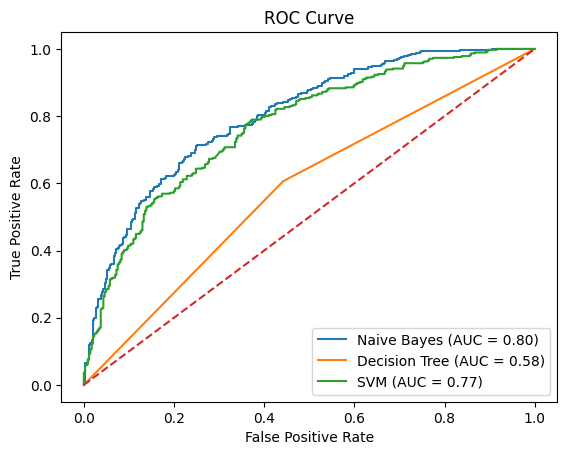

In [ ]:
models = {
    "Naive Bayes": model_nb,
    "Decision Tree": model_dt,
    "SVM": model_svm
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} Evaluation ---")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
   # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC: {roc_auc:.2f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()